### PHASE ESTIMATION 

In [1]:
%matplotlib inline
import numpy as np
import math
from qiskit import IBMQ, BasicAer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute
from qiskit.tools.visualization import plot_histogram

In [2]:
q = QuantumRegister(3,'q')
c = ClassicalRegister(2,'c')
pe = QuantumCircuit(q,c)
pe.x(q[2])
pe.h(q[0])
pe.h(q[1])
pe.cz(q[1],q[2])

In [3]:
def qft(circ,q,n):
    for j in range(n):
        circ.h(q[j])
        for k in range(j+1,n):
            circ.cu1(math.pi/float(2**(k-j)),q[k],q[j])

def qftinverse(circ,q,n):
    for j in range(n):
        k = n-1 - j
        for m in range(k):
            circ.cu1(math.pi/float(2**(k-j)),q[k],q[m])
        circ.h(q[k])

In [4]:
qftinverse(pe,q,2)
pe.measure(q[0],c[0])
pe.measure(q[1],c[1])


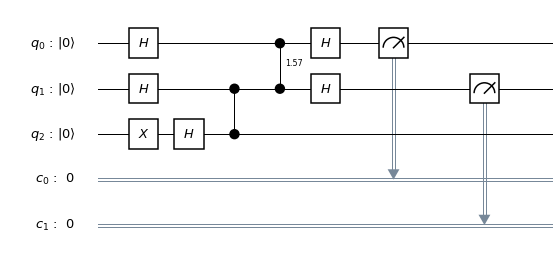

In [5]:
pe.draw(output="mpl")

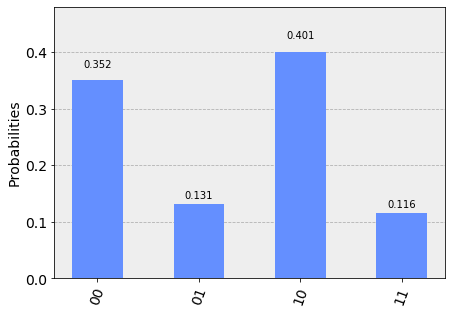

In [7]:
backend = BasicAer.get_backend('qasm_simulator')
shots = 2048
results = execute(pe, backend=backend, shots=shots).result()
answer = results.get_counts()
plot_histogram(answer)
